In [178]:
# we import the necessary libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [179]:
#we create dataframes and use the read excel function to read the excel sheet.
# To specify a particular sheet we use the sheet_name to pull that from that particular sheet
df_first_shift=pd.read_excel("shift-data.xlsx",sheet_name="first")
df_second_shift=pd.read_excel("shift-data.xlsx",sheet_name="second")
df_third_shift=pd.read_excel("third-shift-data.xlsx")




In [180]:
#we use the concat method to join all excel sheets into one data frame 
df_all=pd.concat([df_first_shift,df_second_shift,df_third_shift])
df_all


,Shift,Clock Number,Name,Product,Production Run Time (Min),Products Produced (Units)
0,1,123654,Pete,Pepperoni,46,107
1,1,123498,Abdul,Cheese,56,20
2,1,123999,Emma,Mushroom,42,65
3,1,123654,Pete,Pepperoni,47,83
4,1,123498,Abdul,Mushroom,54,58
...,...,...,...,...,...,...
24,3,322488,Gabrielle,Mushroom,42,134
25,3,322486,Omar,Mushroom,43,132
26,3,322976,Chuck,Cheese,47,143
27,3,322488,Gabrielle,Sausage,45,136


In [181]:
#we use the info method to determine the type of each column
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 28
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Shift                      87 non-null     int64 
 1   Clock Number               87 non-null     int64 
 2   Name                       87 non-null     object
 3   Product                    87 non-null     object
 4   Production Run Time (Min)  87 non-null     int64 
 5   Products Produced (Units)  87 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


In [206]:
# we group the frame by the number of shifts 123 after we get the mean
shift_group=df_all.groupby(["Shift"]).mean()
shift_group

,Clock Number,Production Run Time (Min),Products Produced (Units)
Shift,,,
1,123716.655172,44.689655,54.482759
2,223583.241379,43.689655,80.103448
3,322593.827586,43.034483,128.448276


In [207]:
#we use the loc function to select mean columns out of the grouped data 
productivity_colz=shift_group.loc[:,"Production Run Time (Min)":"Products Produced (Units)"]
productivity_colz

,Production Run Time (Min),Products Produced (Units)
Shift,,
1,44.689655,54.482759
2,43.689655,80.103448
3,43.034483,128.448276


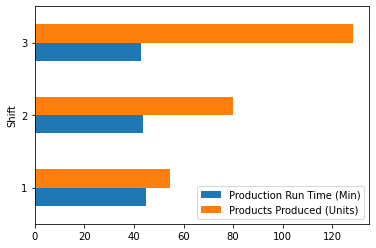

In [208]:
# we use the inverted bar graph to show data
productivity_colz.plot(kind="barh")
plt.show()

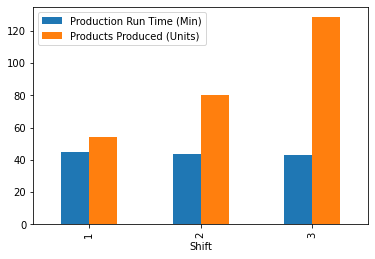

In [209]:
productivity_colz.plot(kind="bar")
plt.show()

In [204]:
# use the to_excel method to convert our dataframes back to excel format
df_all.to_excel("output.xlsx")
